## Social Data Science Project

###  <span style="color:#044e8a"> The Impact of Video Length and Interactivity on YouTube Channel Size and Video Popularity:</span> 
### <span style="color:#044e8a"> Analysis of Greece's Most-Viewed Channels </span>

<span style="color: white; background-color: #044e8a; padding: 2px; border-radius: 3px;">
Objective: </span>

To explore how video length, content type, and interactivity affect channel size and video popularity among the most-viewed YouTube channels in Greece using data from the YouTube API.

Byun et al. (2023). The effect of YouTube comment interaction on video engagement: focusing on interactivity centralization and creators' interactivity. Available at: https://www.emerald.com/insight/content/doi/10.1108/oir-04-2022-0217/full/html

<span style="color: white; background-color: #044e8a; padding: 2px; border-radius: 3px;">
TABLE OF CONTENTS</span>

|**No.**| **Chapter** | **Sections** |
|:-------:|:-------------------|:-----------------|
|**6**| **Data Analysis**|
|||**6.1 Word Count & Most popular word**
|||**6.2 Linear Regression**
|||**6.3 Logistic Regression**
|||**6.4 Logistic model include a Control Variable**
|||**6.5 Logistic model include an Interaction Term**
|||**6.6 Logistic model include a Categorical Predictor**

<span style="color: white; background-color: #145c02; padding: 2px; border-radius: 3px;">
Libraries used: </span>

*this section lists all the libraries required for data collection, cleaning, analysis, and visualization in this project.*

<span style="color:#145c02"> **Data Collection** </span> 

In [1]:
from googleapiclient.discovery import build #for YouTube API access
from bs4 import BeautifulSoup #for HTML parsing during web scraping
import requests #for making HTTP requests
import urllib.parse #for encoding URLs
from fake_useragent import UserAgent #for generating random user agents-in scraping

In [2]:
import time #for adding delays between API or scraping requests
import random #for using random wait times in scraping to avoid detection
from tqdm import tqdm #for progress bars during loops
import re #for regular expressions to clean or parse text
import json #for handling JSON responses the API

<span style="color:#145c02"> **Data Cleaning, Processing, Analysis** </span> 

In [3]:
import pandas as pd #for working with structured datasets
import numpy as np #for numerical computations
import datetime  # For handling date/time conversions and computations
from isodate import parse_duration #for handling ISO 8601 format commonly used in APIs

In [4]:
import hashlib #provides secure hashing algorithms like sha256 for anonymizing sensitive data

In [5]:
from collections import Counter

In [6]:
import statsmodels.api as sm #for statistical analysis and regression modeling
from statsmodels.formula.api import ols #for building regression models using formulas

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
from sklearn.preprocessing import StandardScaler #for normalizing/standardizing data
from sklearn.model_selection import train_test_split #for splitting data into training/testing sets
from sklearn.metrics import mean_squared_error, accuracy_score #for model evaluation

<span style="color:#145c02">**Visualization**</span> 

In [9]:
import matplotlib as plt #core library for visualizations
import matplotlib.pyplot as plt #for plotting and customizing figures
import seaborn as sns #for statistical data visualizations
import plotly.express as px #for interactive and advanced plotes
from wordcloud import WordCloud #for generating word clouds,text analysis

# <span style="color:#1d2224"> **6 | Data Analysis** </span>

### 6.1 | Word Count & Most popular word 

In [35]:
with open('stopwords-el.txt', 'r') as file:
    stop_words = [word.strip().lower() for word in file.readlines()]

In [36]:
stop_words[4:10]

['ακομα', 'ακομη', 'ακριβως', 'αληθεια', 'αληθινα', 'αλλα']

In [37]:
descriptions = ' '.join(video_data['Description_c'].dropna())

In [38]:
descriptions[:200]

'ένα ταξίδι στο μέλλον του χρηματοπιστωτικού συστήματος του χρήματος και της οικονομίας πως η τραπεζική καινοτομία θα επηρεάσει την ζωή μας στα επόμενα χρόνια   ευχαριστούμε την freedom24 για την οικον'

In [39]:
descriptions_words = descriptions.split()

In [40]:
descriptions_words[10:15]

['της', 'οικονομίας', 'πως', 'η', 'τραπεζική']

In [41]:
descriptions_words = [word for word in descriptions.split() if word not in stop_words]

In [42]:
descriptions_words[10:15]

['επόμενα', 'χρόνια', 'ευχαριστούμε', 'freedom24', 'οικονομική']

In [43]:
#function counts the words and then sorts them to count the most used ones.
def my_funlist(ls):
    word_counts = {}
    for word in ls:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    sorted_word_counts = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)
    return sorted_word_counts

In [44]:
word_counts = my_funlist(descriptions_words)

In [45]:
print("Most Common Words:")
for word, count in word_counts[:10]:
    print(f"{word}: {count}")

Most Common Words:
instagram: 8766
βίντεο: 5742
facebook: 5479
κανάλι: 5110
subscribe: 4654
fifa: 4348
and: 4197
for: 3844
business: 3792
εδώ: 3711


*Translation:* \
**Most Common Words:** \
instagram: 8766\
video: 5742\
facebook: 5479\
channel: 5110\
subscribe: 4654\
fifa: 4348\
and: 4197\
for: 3844\
business: 3792\
here: 3711

In [46]:
#function to plot word cloud
def word_cloud_fun(x):
    text = ' '.join(x)
    wordcloud = WordCloud(width=600, height=200, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

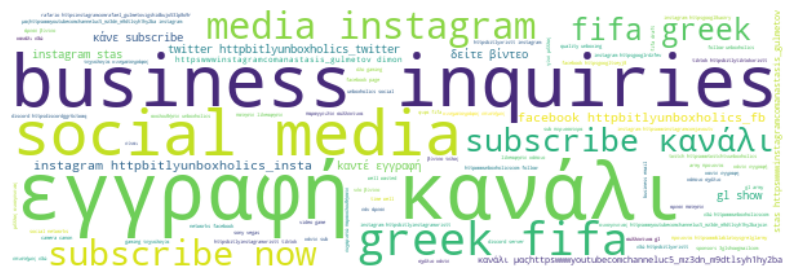

In [47]:
word_cloud_fun(descriptions_words)

In [48]:
word_counts[0][0]

'instagram'

In [49]:
most_popular_word = word_counts[0][0]

In [50]:
video_data['Most_Popular_Word_Count'] = video_data['Description_c'].apply(
    lambda x: x.split().count(most_popular_word) if isinstance(x, str) else 0)

In [51]:
video_data['Most_Popular_Word_Count'].value_counts()

Most_Popular_Word_Count
1    6700
0    6223
2     561
3     250
4      39
5       5
7       1
6       1
Name: count, dtype: int64

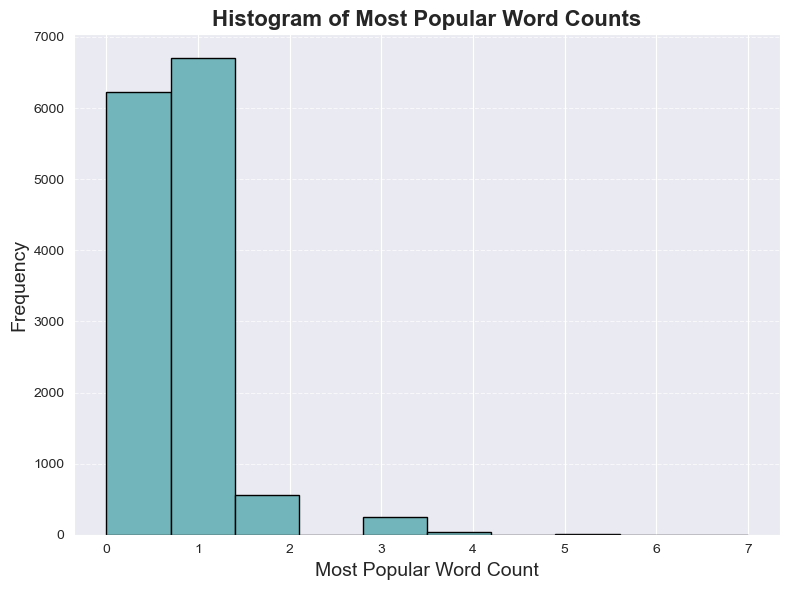

In [52]:
plt.figure(figsize=(8, 6))
plt.hist(video_data['Most_Popular_Word_Count'], bins=10, color="#72B5BA", edgecolor="black")
plt.title("Histogram of Most Popular Word Counts", fontsize=16, fontweight="bold")
plt.xlabel("Most Popular Word Count", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 6.2 | Linear Regression: 

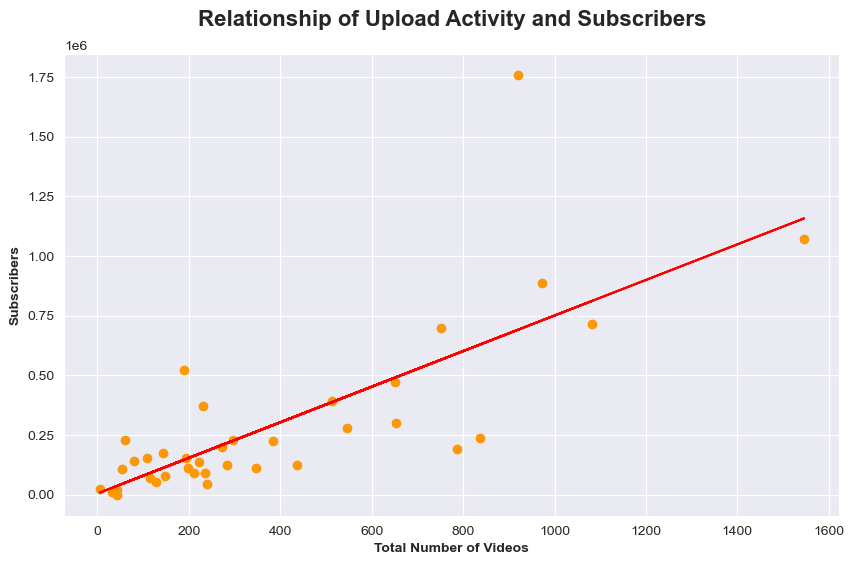

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(channel_data['Total_Videos'], channel_data['Subscribers'], color='#fc9803')

z = np.polyfit(channel_data['Total_Videos'], channel_data['Subscribers'], 1)
p = np.poly1d(z)

plt.plot(channel_data['Total_Videos'], p(channel_data['Total_Videos']), color='red', label=f"Trend Line: y={z[0]:.2f}x + {z[1]:.2f}")
plt.xlabel('Total Number of Videos', fontweight='bold')
plt.ylabel('Subscribers', fontweight='bold')
plt.title('Relationship of Upload Activity and Subscribers', fontweight='bold', pad=20, fontsize=16)
plt.grid(True)
plt.show()

In [54]:
X = channel_data['Total_Videos']
y = channel_data['Subscribers']
X = sm.add_constant(X)

In [55]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Subscribers   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     46.10
Date:                Wed, 25 Dec 2024   Prob (F-statistic):           7.15e-08
Time:                        00:31:54   Log-Likelihood:                -508.97
No. Observations:                  37   AIC:                             1022.
Df Residuals:                      35   BIC:                             1025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5003.0289   5.66e+04      0.088   

**Interpretation of Regression Coefficients:**

1. **Intercept (5003):**
   - The intercept represents the estimated value of the dependent variable (`Subscribers`) when total numbers of videos (`Total_Videos`) is zero. Practically, this scenario might not be meaningful since channels without videos are unlikely to have subscribers. However, it provides a baseline value for the model.

&NewLine;

2. **Total Videos (745.9208):**
    - For each additional video uploaded (`Total_Videos`) by a channel, the estimated number of subscribers (`Subscribers`) increases by approximately 745.92, holding all else constant. The p-value=0.000<0.001 shows that this relationship is statistically significant, meaning there is a strong evidence that the total number of videos is positively associated with the number of subsribers.
   
&NewLine;
   
**Model Fit $R^2$ (0.568):**
    - The $R^2$ value suggests that approximately 56.8% of the variation in Subscribers is explained by the number of (`Total_Videos`). While this is a important proportion, other factors likely contribute to the remaining unexplained variation.

The scatter plot above suggests that the relationship between the (`Total_Videos`) and (`Subscribers`) may not remain linear as the number of videos increases due to a lot of variability, especially at higher values. For instance, after a certain point, adding more videos might yield fewer additional subscribers (a plateau effect). So, a squared term for (`Total_Videos`) could be beneficial either by capturing the possible diminishing returns effect or improving the model fit.

In [56]:
channel_data['Total_Videos_Squared'] = channel_data['Total_Videos'] ** 2

In [57]:
Xb = channel_data[['Total_Videos', 'Total_Videos_Squared']]
Xb = sm.add_constant(Xb)
yb = channel_data['Subscribers']

In [58]:
modelb = sm.OLS(yb, Xb).fit()
print(modelb.summary())

                            OLS Regression Results                            
Dep. Variable:            Subscribers   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     22.55
Date:                Wed, 25 Dec 2024   Prob (F-statistic):           5.83e-07
Time:                        00:32:11   Log-Likelihood:                -508.90
No. Observations:                  37   AIC:                             1024.
Df Residuals:                      34   BIC:                             1029.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.384e+04 

The squared term (`Total_Videos_Squared`) does not significantly improve the model (p-value=0.711>0.001) and contributes very little to explaining the variation in (`Subscribers`). Also, the improvement in $R^2$ is insignificant compared to the model with only the linear term.

### 6.3 | Logistic Regression: 

A new binary variable was created to classify whether a video is popular or not, based on the median of all views. The median was chosen instead of the mean because it is not affected by outliers, and YouTube view counts often follow a highly skewed distribution, as demonstrated in the visualization above. This skewness is due to a small number of videos achieving extremely high view counts (viral content)

In [150]:
median_views = video_data['Views'].median()
video_data['Popular'] = (video_data['Views'] > median_views).astype(int)

In [59]:
video_data[['Comments', 'Popular']].describe()

,Comments,Popular
count,13780.000000,13780.000000
mean,507.206676,0.500000
std,2641.939389,0.500018
min,0.000000,0.000000
25%,50.000000,0.000000
50%,162.000000,0.500000
75%,425.250000,1.000000
max,161427.000000,1.000000


In [61]:
X1 = video_data['Comments']
y1 = video_data['Popular']
X1 = sm.add_constant(X1)

In [62]:
logit_model1 = sm.Logit(y1, X1).fit()

Optimization terminated successfully.
         Current function value: 0.681404
         Iterations 7


In [63]:
print(logit_model1.summary())

                           Logit Regression Results                           
Dep. Variable:                Popular   No. Observations:                13780
Model:                          Logit   Df Residuals:                    13778
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Dec 2024   Pseudo R-squ.:                 0.01694
Time:                        00:32:45   Log-Likelihood:                -9389.7
converged:                       True   LL-Null:                       -9551.6
Covariance Type:            nonrobust   LLR p-value:                 2.323e-72
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1657      0.020     -8.176      0.000      -0.205      -0.126
Comments       0.0004    3.2e-05     13.523      0.000       0.000       0.000


In [66]:
log_odds_const1 = logit_model1.params['const']
log_odds_comments1 = logit_model1.params['Comments']

odds_const1 = np.exp(log_odds_const1)
odds_comments1 = np.exp(log_odds_comments1)

In [67]:
print(f"Intercept Odds: {odds_const1}")
print(f"Comments Odds: {odds_comments1}")

Intercept Odds: 0.8472938994144801
Comments Odds: 1.0004334873535667


In [68]:
percentage_const1 = round((odds_const1 - 1) * 100,2)
percentage_const1

-15.27

In [69]:
percentage_more_likely_comments1 = (odds_comments1 - 1) * 100
print(f"Each additional comment increases likelihood of popularity by: {percentage_more_likely_comments1:.2f}%")

Each additional comment increases likelihood of popularity by: 0.04%


**Interpretation of Regression Coefficients:**

1. **Intercept (-0.1657):**
   - The intercept represents the estimated value of the dependent variable (`Popular`) when total numbers of comments (`Comments`) is zero. In this case, a negative coefficient of -0.1657 means that the log-odds of a video with no comments being popular are negative, indicating that videos with no comments are approximately 15.3% less likely to be popular.The p-value=0.000<0.001 shows that this relationship is statistically significant,meaning that the baseline log-odds of a video being popular when there are zero comments is significantly different from zero.

&NewLine;

2. **Comments (0.0004):**
    - For every additional video comment (`Comments`), the log-odds of a video being classified as popular (`Popular`) increases by  0.0004. In this case the likelihood of a video being popular increases by approximately 0.04%. The p-value=0.000<0.001 shows that this relationship is statistically significant, meaning that there is a strong relationship between the number of comments and the likelihood of a video being popular. 
   
&NewLine;
   
**Pseudo $R^2$ (0.01694):**
    - The $R^2$ that the model explains about 1.69% of the variance in popularity. Of course, other factors likely play a larger role in determining popularity.

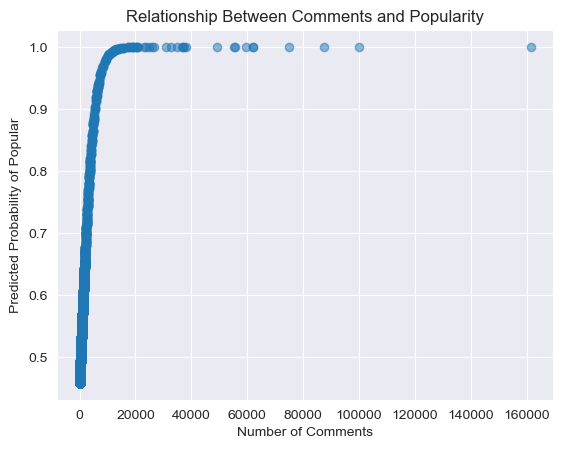

In [70]:
video_data['Predicted_Probability'] = logit_model1.predict(sm.add_constant(video_data['Comments']))

plt.scatter(video_data['Comments'], video_data['Predicted_Probability'], alpha=0.5)
plt.xlabel('Number of Comments')
plt.ylabel('Predicted Probability of Popular')
plt.title('Relationship Between Comments and Popularity')
plt.show()

The large range of Comments (from very low to 160,000) could benefit from a log transformation to compress the scale and better capture the diminishing returns at higher comment counts

In [71]:
video_data['Log_Comments'] = np.log1p(video_data['Comments'])

In [72]:
X2 = video_data['Log_Comments']
X2 = sm.add_constant(X2)
logit_model_log2 = sm.Logit(video_data['Popular'], X2).fit()

Optimization terminated successfully.
         Current function value: 0.566724
         Iterations 6


In [73]:
print(logit_model_log2.summary())

                           Logit Regression Results                           
Dep. Variable:                Popular   No. Observations:                13780
Model:                          Logit   Df Residuals:                    13778
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Dec 2024   Pseudo R-squ.:                  0.1824
Time:                        00:33:20   Log-Likelihood:                -7809.5
converged:                       True   LL-Null:                       -9551.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.5940      0.080    -45.130      0.000      -3.750      -3.438
Log_Comments     0.7258      0.015     47.490      0.000       0.696       0.756


In [74]:
log_odds_const2 = logit_model_log2.params['const']
log_odds_comments2 = logit_model_log2.params['Log_Comments']

odds_const2 = np.exp(log_odds_const2)
odds_comments2 = np.exp(log_odds_comments2)

In [75]:
print(f"Intercept Odds: {odds_const2}")
print(f"Comments Odds: {odds_comments2}")

Intercept Odds: 0.02748843103214267
Comments Odds: 2.066339193933272


In [76]:
percentage_const2 = round((odds_const2 - 1) * 100,2)
percentage_const2

-97.25

In [77]:
percentage_more_likely_comments2 = (odds_comments2 - 1) * 100
print(f"Each additional comment increases likelihood of popularity by: {percentage_more_likely_comments2:.2f}%")

Each additional comment increases likelihood of popularity by: 106.63%


**Interpretation of Regression Coefficients:**

1. **Intercept (-3.5940):**
   - The intercept represents the estimated log-odds of a video being classified as popular (`Popular`) when the log-transformed numbers of comments (`Log_Comments`) is zero, which corresponds to a video with one comment. In this case, a negative coefficient of -3.5940 indicates that the log-odds of a video with only one comment being popular are negative, indicating that videos with no comments are negative. This translates to an odds ratio of approximately 0.0275, meaning that videos with one comment are about 97.25% less likely to be calssified as popular. The p-value=0.000<0.001 shows that this relationship is statistically significant,meaning that the baseline log-odds of a video being popular when comments are significantly different from zero.

&NewLine;

2. **Log Comments (0.7258):**
    - For every additional unit increase in the log-transformed number of comments (`Log_Comments`), the log-odds of a video being classified as popular (`Popular`) increases by 0.7258. This translates to an odds ratio of 2.066, indicating that the likelihood of a video being popular approximately doubles (increases by 106.63%) for every unit increase in (`Log_Comments`). The p-value=0.000<0.001 confirms that this relationship is statistically significant, indicating a strong and meaningful relationship between the number of comments and the likelihood of a video being popular
   
&NewLine;
   
**Pseudo $R^2$ (0.1824):**
    - The $R^2$ that the model explains about 18.24% of the variance in popularity. Of course, other factors likely play a larger role in determining popularity.

### 6.4 | Logistic model include a Control Variable: 

In [78]:
X3 = video_data[['Log_Comments', 'Published_Year']]
y3 = video_data['Popular']
X3 = sm.add_constant(X3)

In [79]:
logit_model3 = sm.Logit(y3, X3).fit()

Optimization terminated successfully.
         Current function value: 0.502869
         Iterations 8


In [80]:
print(logit_model3.summary())

                           Logit Regression Results                           
Dep. Variable:                Popular   No. Observations:                13780
Model:                          Logit   Df Residuals:                    13777
Method:                           MLE   Df Model:                            2
Date:                Wed, 25 Dec 2024   Pseudo R-squ.:                  0.2745
Time:                        00:33:36   Log-Likelihood:                -6929.5
converged:                       True   LL-Null:                       -9551.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -677.4722     18.335    -36.949      0.000    -713.409    -641.536
Log_Comments       0.9584      0.019     50.914      0.000       0.922       0.995
Published_Year     0.3328      0.009

In [81]:
log_odds_const3 = logit_model3.params['const']
log_odds_comments3 = logit_model3.params['Log_Comments']
log_odds_year3 = logit_model3.params['Published_Year']

odds_const3 = np.exp(log_odds_const3)
odds_comments3 = np.exp(log_odds_comments3)
odds_year3 = np.exp(log_odds_year3)

In [82]:
print(f"Intercept Odds: {odds_const3:.4f}")
print(f"Comments Odds: {odds_comments3:.4f}")
print(f" Year Odds: {odds_year3:.4f}")

Intercept Odds: 0.0000
Comments Odds: 2.6076
 Year Odds: 1.3949


In [83]:
percentage_const3 = round((odds_const3 - 1) * 100, 2)
percentage_comments3 = round((odds_comments3 - 1) * 100, 2)
percentage_year3 = round((odds_year3 - 1) * 100, 2)

In [84]:
print(f"Intercept Percentage Change: {percentage_const3}")
print(f"Comments Percentage Change: {percentage_comments3}")
print(f" Year Percentage Change: {percentage_year3}")

Intercept Percentage Change: -100.0
Comments Percentage Change: 160.76
 Year Percentage Change: 39.49


**Interpretation of Regression Coefficients:**

1. **Intercept (-677.4722):**
   - The intercept represents the estimated log-odds of a video being classified as popular (`Popular`) when the log-transformed numbers of comments (`Log_Comments`) and the published year (`Published_Year`) is zero. Practically, this is impossible,but the large negative value indicates extremely low odds of popularity.A percentage change of -100.0% signifies that videos in this hypothetical baseline scenario are completely unlikely to be popular. The p-value=0.000<0.001 shows that baseline log-odds is statistically significant.

&NewLine;

2. **Log Comments (0.9584):**
    - For every additional unit increase in the log-transformed number of comments (`Log_Comments`), the log-odds of a video being classified as popular (`Popular`) increases by 0.9584. This translates to an odds ratio of 2.6076, indicating that for every unit increase the likelihood of a video being popular increase by approximately 2.61 times.A percentage change of 160.76%, means that videos with higher numbers of comments are significantly more likely to be popular.The p-value=0.000<0.001 confirms that this relationship is statistically significant, indicating a strong and positive relationship between the number of comments and the likelihood of a video being popular
    
3. **Published_Year (0.3328):**
    - For every additional year (`Published_Year`) the log-odds of a video being classified as popular (`Popular`) increases by 0.3328. This translates to an odds ratio of 1.3949, meaining that the odds of a video being popular increase by approximately 1.39 times for each passing year. A percentage change of 39.49%, means a consistent trend of increasing video popularity over time.The p-value=0.000<0.001 confirms that this relationship is statistically significant, highlighting a meaningful temporal trend in video popularity.
   
&NewLine;
   
**Pseudo $R^2$ (0.2745):**
    - The $R^2$ that the model explains about 27.45% of the variance in popularity. Of course, other factors likely play a larger role in determining popularity.

The inclusion of the control variable `Published_Year` in the model helps account for temporal trends that might influence the popularity of videos over time. Specifically, it indicates that videos published in more recent years are more likely to be popular, as well as improves the model's ability to explain the variance in the dependent variable.

### 6.5 | Logistic model include an Interaction Term: 

In [85]:
vidcom_data = video_data.merge(
    comments_data[['Video_ID', 'Replies_Presence']],
    left_on='Id',
    right_on='Video_ID',
    how='left'
)

In [86]:
vidcom_data['Replies_Presence'] = vidcom_data['Replies_Presence'].fillna(0).astype(int)

In [87]:
vidcom_data['Replies_Presence'].unique()

array([0, 1])

In [88]:
vidcom_data['Interaction_Term'] = vidcom_data['Replies_Presence'] * vidcom_data['Log_Comments']

In [89]:
X4 = vidcom_data[['Log_Comments', 'Published_Year','Interaction_Term']]
y4 = vidcom_data['Popular']
X4 = sm.add_constant(X4)

In [90]:
logit_model4 = sm.Logit(y4, X4).fit()

Optimization terminated successfully.
         Current function value: 0.672219
         Iterations 5


In [91]:
print(logit_model4.summary())

                           Logit Regression Results                           
Dep. Variable:                Popular   No. Observations:                44803
Model:                          Logit   Df Residuals:                    44799
Method:                           MLE   Df Model:                            3
Date:                Wed, 25 Dec 2024   Pseudo R-squ.:                 0.01185
Time:                        00:33:57   Log-Likelihood:                -30117.
converged:                       True   LL-Null:                       -30479.
Covariance Type:            nonrobust   LLR p-value:                2.710e-156
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -148.7897      8.304    -17.918      0.000    -165.065    -132.514
Log_Comments         0.0026      0.005      0.496      0.620      -0.008       0.013
Published_Year       0.0737 

In [92]:
log_odds_const4 = logit_model4.params['const']
log_odds_comments4 = logit_model4.params['Log_Comments']
log_odds_year4 = logit_model4.params['Published_Year']
log_odds_int4 = logit_model4.params['Interaction_Term']

odds_const4 = np.exp(log_odds_const4)
odds_comments4 = np.exp(log_odds_comments4)
odds_year4 = np.exp(log_odds_year4)
odds_int4 = np.exp(log_odds_int4)

In [93]:
print(f"Intercept Odds: {odds_const4:.4f}")
print(f"Comments Odds: {odds_comments4:.4f}")
print(f"Year Odds: {odds_year4:.4f}")
print(f"Interaction Term Odds: {odds_int4:.4f}")

Intercept Odds: 0.0000
Comments Odds: 1.0027
Year Odds: 1.0765
Interaction Term Odds: 1.1600


In [94]:
percentage_const4 = round((odds_const4 - 1) * 100, 2)
percentage_comments4 = round((odds_comments4 - 1) * 100, 2)
percentage_year4 = round((odds_year4 - 1) * 100, 2)
percentage_int4 = round((odds_int4 - 1) * 100, 2)

In [95]:
print(f"Intercept Percentage Change: {percentage_const4}")
print(f"Comments Percentage Change: {percentage_comments4}")
print(f"Year Percentage Change: {percentage_year4}")
print(f"Interaction Percentage Change: {percentage_int4}")

Intercept Percentage Change: -100.0
Comments Percentage Change: 0.27
Year Percentage Change: 7.65
Interaction Percentage Change: 16.0


**Interpretation of Regression Coefficients:**

1. **Intercept (-148.7897):**
   - The intercept represents the baseline log-odds of a video being classified as popular (`Popular`) when all predictors are at their baseline values (Log_Comments = 0, Published_Year = 0, and Interaction_Term = 0). The odds of popularity at this baseline are essentially 0, indicating that videos with no comments, from year zero, and no replies presence are impossible to be popular. The p-value=0.000<0.001 shows that baseline log-odds is statistically significant.
   
&NewLine;

2. **Log Comments (0.0026):**
    - For every additional unit increase in the log-transformed number of comments (`Log_Comments`), the log-odds of a video being classified as popular (`Popular`) increases by 0.0026. This translates to an odds ratio of 1.0027,, indicating that for every unit increase the likelihood of a video being popular increase by approximately 1.0027 times. The p-value=0.620>0.001 indicates that this relationship is **NOT** statistically significant,when controlling `Published_Year` and the `Interaction Term`.
    
3. **Published_Year (0.0737):**
    - For every additional year (`Published_Year`) the log-odds of a video being classified as popular (`Popular`) increases by 0.0737 (or percentage Change: 0.27%). This translates to an odds ratio of 1.0765, meaining that the odds of a video being popular increase by approximately 1.076 times for each passing year. The p-value=0.000<0.001 confirms that this relationship is statistically significant, highlighting a meaningful temporal trend in video popularity or may reflect changes in audience preferences, platform algorithms, or other temporal factors.
    
4. **Interaction Term (Log Comments x Replies Presence (0.1484):**
    - The interaction between `Log Comments` and  `Replies Presence` has a strong positive effect on popularity (`Popular`). For every one unit increase in the interaction term, the odds of a video being popular increase by 0.1484 (or percentage Change: 16.0%). The p-value=0.000<0.001 confirms that this interaction is statistically,  significant,and highlights that videos with higher comments are significantly more likely to be popular when there replying comments too (thread-conversation).
   
&NewLine;
   
**Pseudo $R^2$ (0.01185):**
    - The $R^2$ that the model explains about 1.2%% of the variance in popularity.This is a small effect, suggesting that while the included predictors contribute meaningfully, other factors not captured in the model likely play a substantial role in determining video popularity.

The model with the interaction term explains far less variance, suggesting that while replies add context, other factors likely drive video popularity. However, the intercept is less extreme suggesting that the interaction term helps capture some baseline variance.

### 6.6 | Logistic model include a Categorical Predictor:

In [96]:
vidcom_data['Video_Length_Category'].unique()

array(['long', 'medium', nan, 'short', 'super long'], dtype=object)

In [97]:
vidcom_data['Video_Length_Category'] = vidcom_data['Video_Length_Category'].fillna('unknown')

In [98]:
print(pd.api.types.is_categorical_dtype(vidcom_data['Video_Length_Category']))

False


/var/folders/qt/nkv93n510wlcddjjxc58klyr0000gn/T/ipykernel_4780/2817792131.py:1: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  print(pd.api.types.is_categorical_dtype(vidcom_data['Video_Length_Category']))


In [99]:
vidcom_data['Video_Length_Category'] = pd.Categorical(vidcom_data['Video_Length_Category'])

In [100]:
print(pd.api.types.is_categorical_dtype(vidcom_data['Video_Length_Category']))

True


/var/folders/qt/nkv93n510wlcddjjxc58klyr0000gn/T/ipykernel_4780/2817792131.py:1: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  print(pd.api.types.is_categorical_dtype(vidcom_data['Video_Length_Category']))


In [101]:
vidcom_data['Video_Length_Category'].unique()

['long', 'medium', 'unknown', 'short', 'super long']
Categories (5, object): ['long', 'medium', 'short', 'super long', 'unknown']

In [102]:
length_dummies = pd.get_dummies(vidcom_data['Video_Length_Category'],  prefix='Length',drop_first=True,dtype=int)

In [103]:
length_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44803 entries, 0 to 44802
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Length_medium      44803 non-null  int64
 1   Length_short       44803 non-null  int64
 2   Length_super long  44803 non-null  int64
 3   Length_unknown     44803 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


In [104]:
length_dummies = length_dummies.drop(columns=['Length_unknown'])

In [105]:
vidcom_concat = pd.concat([vidcom_data, length_dummies], axis=1)

In [106]:
predictors = ['Log_Comments', 'Interaction_Term', 'Published_Year'] + list(length_dummies.columns)
X5 = vidcom_concat[predictors]
X5 = sm.add_constant(X5)

In [107]:
logit_model5 = sm.Logit(vidcom_concat['Popular'], X5).fit()

Optimization terminated successfully.
         Current function value: 0.584665
         Iterations 8


In [108]:
print(logit_model5 .summary())

                           Logit Regression Results                           
Dep. Variable:                Popular   No. Observations:                44803
Model:                          Logit   Df Residuals:                    44796
Method:                           MLE   Df Model:                            6
Date:                Wed, 25 Dec 2024   Pseudo R-squ.:                  0.1406
Time:                        00:34:37   Log-Likelihood:                -26195.
converged:                       True   LL-Null:                       -30479.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -303.1090     10.916    -27.766      0.000    -324.505    -281.713
Log_Comments          0.3170      0.009     36.638      0.000       0.300       0.334
Interaction_Term      0.

In [111]:
log_odds_const5 = logit_model5.params['const']
log_odds_comments5 = logit_model5.params['Log_Comments']
log_odds_year5 = logit_model5.params['Published_Year']
log_odds_int5 = logit_model5.params['Interaction_Term']
log_odds_lm5 = logit_model5.params['Length_medium']
log_odds_ls5 = logit_model5.params['Length_short']
log_odds_lsl5 = logit_model5.params['Length_super long']

odds_const5 = np.exp(log_odds_const5)
odds_comments5 = np.exp(log_odds_comments5)
odds_year5 = np.exp(log_odds_year5)
odds_int5 = np.exp(log_odds_int5)
odds_lm5 = np.exp(log_odds_lm5)
odds_ls5 = np.exp(log_odds_ls5)
odds_lsl5 = np.exp(log_odds_lsl5)

In [112]:
print(f"Intercept Odds: {odds_const5:.4f}")
print(f"Comments Odds: {odds_comments5:.4f}")
print(f"Year Odds: {odds_year5:.4f}")
print(f"Interaction Term Odds: {odds_int5:.4f}")
print(f"Length Medium Odds: {odds_lm5 :.4f}")
print(f"Length Short Odds: {odds_ls5 :.4f}")
print(f"Length Super Long Odds: {odds_lsl5 :.4f}")

Intercept Odds: 0.0000
Comments Odds: 1.3730
Year Odds: 1.1600
Interaction Term Odds: 1.1243
Length Medium Odds: 7.5495
Length Short Odds: 6.9590
Length Super Long Odds: 49.1583


In [113]:
percentage_const5 = round((odds_const5 - 1) * 100, 2)
percentage_comments5 = round((odds_comments5 - 1) * 100, 2)
percentage_year5 = round((odds_year5 - 1) * 100, 2)
percentage_int5 = round((odds_int5 - 1) * 100, 2)

In [114]:
print(f"Intercept Percentage Change: {percentage_const5}")
print(f"Comments Percentage Change: {percentage_comments5}")
print(f"Year Percentage Change: {percentage_year5}")
print(f"Interaction Percentage Change: {percentage_int5}")

Intercept Percentage Change: -100.0
Comments Percentage Change: 37.3
Year Percentage Change: 16.0
Interaction Percentage Change: 12.43


**Interpretation of Regression Coefficients:**

1. **Intercept (-314.2358):**
   - The intercept represents the baseline log-odds of a video being classified as popular (`Popular`) when all predictors are at their reference levels. The p-value=0.000>0.001 indicates that this relationship is statistically significant, but it is not particularly meaningful for interpretation due to its role as a baseline adjustment. 
   
&NewLine;

2. **Log Comments (0.3170):**
    - For every unit increase in the log-transformed number of comments(`Log Comments`), the log-odds of a video being popular increase by 0.3170. This corresponds to a 37.3% increase in the odds of popularity for each additional unit of `Log Comments`. The p-value=0.000>0.001 indicates that this relationship is statistically significant, emphasizing the importance of comments in driving video popularity.
    
&NewLine;

3. **Published_Year (0.1484):**
    - For every additional year (`Published_Year`) the log-odds of a video being classified as popular (`Popular`) increases by  0.1484., corresponding to a 16.0% increase in the odds of popularity for each additional year. The p-value=0.000<0.001 confirms that this relationship is statistically significant, highlighting a meaningful temporal trend in video popularity or may reflect changes in audience preferences, platform algorithms, or other temporal factors.
    
&NewLine;
    
4. **Interaction Term (Log Comments x Replies Presence (0.1172):**
    - The interaction between `Log Comments` and  `Replies Presence` indicates that for every one-unit increase in the interaction term, the log-odds of a video being popular (`Popular`) increase by 0.1172, corresponding to a 12.43% increase in the odds of popularity when replies amplify the effect of comments. The p-value=0.000<0.001 confirms that this interaction is statistically significant, showcasing the enhanced importance of comments when replies are present.
    
&NewLine;
    
5. **Length medium  (2.0215):**
    - Medium-length videos are approximately 7.5 times (odds=7.5495) more likely to be popular compared to videos in the reference category.The p-value=0.000<0.001 confirms its statistical significance.
    
&NewLine;
    
6. **Length short  (1.9400):**
    - Short-length videos are approximately 7 times (odds=6.9590) more likely to be popular compared to the reference category.The p-value=0.000<0.001 confirms its statistical significance.
    
&NewLine;
    
7. **Length super long (3.8950):**
    - Super-long videos are approximately 49 times (odds=49.1583) more likely to be popular compared to the reference category. The p-value=0.000<0.001 confirms its statistical significance.
   
&NewLine;
   
**Pseudo $R^2$ (0.1406):**
    - The $R^2$ that the model explains about 14.06%% of the variance in popularity.This is a small effect, suggesting that while the included predictors contribute meaningfully, other factors not captured in the model likely play a substantial role in determining video popularity.

The inclusion of video length categories significantly improves the model’s explanatory power, with the pseudo $R^2$ increasing from 0.01185 to 0.1406. Futhermore, in the simpler model `Log_Comments` was not significant, but when video length categories are included, it becomes highly significant, highlighting its importance in combination with other predictors.

Also, all categories significantly increase the odds of popularity compared to the reference category, and specifically super-long videos show the strongest effect, with odds approximately 49 times higher than the reference category.